C:\Users\hameh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


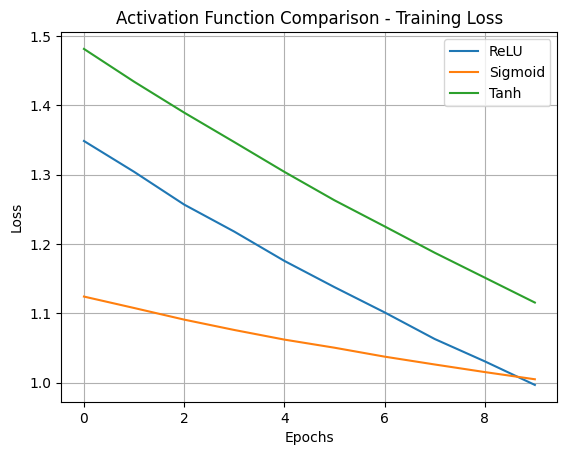

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
X = df.drop(['species'], axis=1)
y = df['species']
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

def create_model(activation_func):
    model = Sequential([
        Dense(16, input_shape=(X_train.shape[1],), activation=activation_func),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

relu_model = create_model('relu')
sigmoid_model = create_model('sigmoid')
tanh_model = create_model('tanh')

relu_history = relu_model.fit(X_train, y_train, epochs=10, verbose=0)
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs=10, verbose=0)
tanh_history = tanh_model.fit(X_train, y_train, epochs=10, verbose=0)

plt.plot(relu_history.history['loss'], label='ReLU')
plt.plot(sigmoid_history.history['loss'], label='Sigmoid')
plt.plot(tanh_history.history['loss'], label='Tanh')
plt.title('Activation Function Comparison - Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
